## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


<h1>Q1: Generate and numerically represent a confidence interval</h1>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [3]:
import re
text = """
1. Class Name: 2 (democrat, republican)
2. handicapped-infants: 2 (y,n)
3. water-project-cost-sharing: 2 (y,n)
4. adoption-of-the-budget-resolution: 2 (y,n)
5. physician-fee-freeze: 2 (y,n)
6. el-salvador-aid: 2 (y,n)
7. religious-groups-in-schools: 2 (y,n)
8. anti-satellite-test-ban: 2 (y,n)
9. aid-to-nicaraguan-contras: 2 (y,n)
10. mx-missile: 2 (y,n)
11. immigration: 2 (y,n)
12. synfuels-corporation-cutback: 2 (y,n)
13. education-spending: 2 (y,n)
14. superfund-right-to-sue: 2 (y,n)
15. crime: 2 (y,n)
16. duty-free-exports: 2 (y,n)
17. export-administration-act-south-africa: 2 (y,n)
"""
pattern = re.compile(r'\b[a-zA-Z -]+(?=:)')
re.findall(pattern=pattern, string=text)

['Class Name',
 'handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [0]:
column_headers = re.findall(pattern=pattern, string=text)

In [0]:
df.columns = column_headers

In [6]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [7]:
df = df.replace({'?': np.NaN})
df.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN
9,republican,n,y,n,y,y,n,n,n,n,n,NaN,NaN,y,y,n,n


In [0]:
df = df.replace({'y':1, 'n':0})

In [9]:
dem = df[df['Class Name'] == 'democrat']
rep = df[df['Class Name'] == 'republican']
dem

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
1,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
4,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
425,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
427,democrat,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
428,democrat,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
data = df['el-salvador-aid'].dropna()

In [12]:
confidence_interval(data)

(0.5035799522673031, 0.45550950874891005, 0.5516503957856962)

<h1>Q2: Graphically (with a plot) represent the confidence interval</h1>

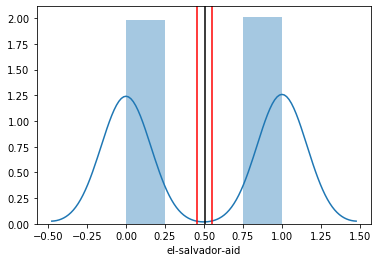

In [13]:
sns.distplot(data);
CI = confidence_interval(data);
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='k');

<h1>Q3: Interpret the confidence interval - what does it tell you about the data and its distribution?</h1>

In [0]:
# The confidence interval shows a univariate distribution and places
# the mean at 0.503 meaning that the vote barely bassed. The 95%
# confidence interval [0.455,0.551] is a range of values that you can be 95% certain 
# contains the true mean of the population.(0.503)

<h1>Q4: Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data by hand using Numpy and in a single line using Scipy

In [0]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [0]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

In [27]:
df.columns = column_headers
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [0]:
contingency_table = pd.crosstab(df['sex'], df['education-num'])

In [47]:
contingency_table

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3735,1187,484,327


In [42]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)



===Chi2 Stat===
297.62904548134543


===Degrees of Freedom===
15


===P-Value===
1.737778531313181e-54


===Contingency Table===
[[  16.87103808   55.57518428  110.15795455  213.69981572  170.03359951
   308.64075553  388.69548526  143.23842138 3473.77982187 2411.89683661
   457.1720516   352.96858108 1771.1281941   569.97644349  190.54348894
   136.62232801]
 [  34.12896192  112.42481572  222.84204545  432.30018428  343.96640049
   624.35924447  786.30451474  289.76157862 7027.22017813 4879.10316339
   924.8279484   714.03141892 3582.8718059  1153.02355651  385.45651106
   276.37767199]]


In [0]:
# Numpy Chi Squared Test

In [0]:
contingency_table_with_margins = pd.crosstab(df['sex'], df['education-num'], margins=True)

In [49]:
contingency_table_with_margins

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86,10771
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3735,1187,484,327,21789
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5354,1723,576,413,32560


In [51]:
femalecount = contingency_table.iloc[0][0:16].values
femalecount

array([  16,   46,   84,  160,  144,  295,  432,  144, 3390, 2806,  500,
        421, 1619,  536,   92,   86])

In [52]:
malecount = contingency_table.iloc[1][0:16].values
malecount

array([  35,  122,  249,  486,  370,  638,  743,  289, 7111, 4485,  882,
        646, 3735, 1187,  484,  327])

In [54]:
# Calculate row and column totals to use in the expected value calculations
row_sums = contingency_table_with_margins.iloc[0:2, 16].values
col_sums = contingency_table_with_margins.iloc[2, 0:16].values

total = contingency_table_with_margins.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

[10771 21789]
[   51   168   333   646   514   933  1175   433 10501  7291  1382  1067
  5354  1723   576   413]
32560


In [55]:
# Now we have everything that we need to calculate our table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

expected

array([[  16.87103808,   55.57518428,  110.15795455,  213.69981572,
         170.03359951,  308.64075553,  388.69548526,  143.23842138,
        3473.77982187, 2411.89683661,  457.1720516 ,  352.96858108,
        1771.1281941 ,  569.97644349,  190.54348894,  136.62232801],
       [  34.12896192,  112.42481572,  222.84204545,  432.30018428,
         343.96640049,  624.35924447,  786.30451474,  289.76157862,
        7027.22017813, 4879.10316339,  924.8279484 ,  714.03141892,
        3582.8718059 , 1153.02355651,  385.45651106,  276.37767199]])

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

In [56]:
observed = contingency_table
observed

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3735,1187,484,327


In [57]:
chi_squared = (((observed - expected)**2)/expected).sum().sum()

chi_squared

297.62904548134543

In [58]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
297.62904548134543


===Degrees of Freedom===
15


===P-Value===
1.737778531313181e-54


===Contingency Table===
[[  16.87103808   55.57518428  110.15795455  213.69981572  170.03359951
   308.64075553  388.69548526  143.23842138 3473.77982187 2411.89683661
   457.1720516   352.96858108 1771.1281941   569.97644349  190.54348894
   136.62232801]
 [  34.12896192  112.42481572  222.84204545  432.30018428  343.96640049
   624.35924447  786.30451474  289.76157862 7027.22017813 4879.10316339
   924.8279484   714.03141892 3582.8718059  1153.02355651  385.45651106
   276.37767199]]


<h2>Chi Squared Stats are the same for numpy and scipy</h2>

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)